In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Linear Regression Exercise: Predicting Canada's Per Capita Income

## Overview
In this exercise, you will build a simple linear regression model to predict Canada's per capita income based on the year. The dataset is provided by the instructor in the video linked below.

## Resources
- **Video Tutorial**: [Linear Regression Tutorial](https://youtu.be/8jazNUpO3lQ?si=DoP82P4Ph5QcrK0U)
- **Dataset**: [Canada Per Capita Income Dataset](https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv)

## Dataset Description
The dataset contains two columns:
1. **Year**: The year for which the data is recorded.
2. **Per capita income (US$)**: The per capita income in US dollars for that year.


In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv')

In [28]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [30]:
df.isnull().sum()

year                       0
per capita income (US$)    0
dtype: int64

In [31]:
df.shape

(47, 2)

In [32]:
import matplotlib.pyplot as plt

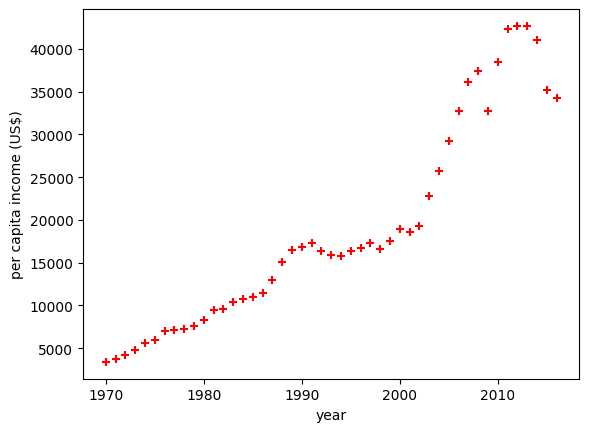

In [33]:
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df['year'],df['per capita income (US$)'],color='red',marker='+')

# import LinearRegression

In [34]:
x= df[['year']]  
y = df['per capita income (US$)']  

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
LR=LinearRegression()

In [37]:
LR.fit(x,y)

LinearRegression()

# prediction = (coef * year) + intercept

In [38]:
LR.coef_

array([828.46507522])

In [39]:
LR.intercept_

-1632210.7578554575

In [40]:
LR.predict([[1990]]) 

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16434.74183774])

In [41]:
y_pred=LR.predict(x)

In [42]:
df['y_pred'] =y_pred

In [43]:
df['y_pred'].shape

(47,)

In [44]:
df.head()

,year,per capita income (US$),y_pred
0,1970,3399.299037,-134.559667
1,1971,3768.297935,693.905409
2,1972,4251.175484,1522.370484
3,1973,4804.463248,2350.835559
4,1974,5576.514583,3179.300634


# Error calculation

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [46]:
mse = mean_squared_error(y, y_pred)  
mae = mean_absolute_error(y, y_pred)  
r2 = r2_score(y, y_pred)  

In [47]:
print(mse)
print(mae)
print(r2)

15462739.061504772
3088.866427771443
0.890916917957032


# Per Capita Income by Year and Prediction Line

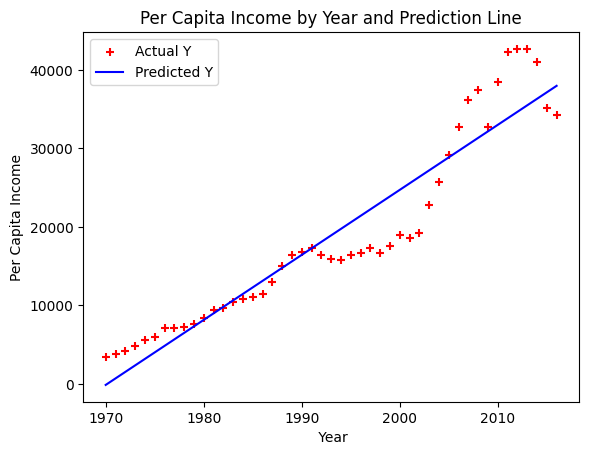

In [48]:
plt.scatter(x, y, color='red', marker='+', label='Actual Y')
plt.plot(x, y_pred, color='blue', label='Predicted Y')
plt.xlabel(' Year')
plt.ylabel('Per Capita Income')
plt.title('Per Capita Income by Year and Prediction Line')
plt.legend()
plt.show()